###  Digit Recognition

Deep learning convolutional network for MNIST dataset.

![](model_cnn_digit.png)

In [126]:
import numpy as np
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.datasets import mnist
from tensorflow.keras import utils

In [127]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


Load the MNIST dataset and reshape it so that it is suitable for use training a CNN.   
In Keras, the layers used for two-dimensional convolutions expect pixel values with the dimensions [pixels][width][height].

In the case of RGB, the first dimension pixels would be 3 for the red, green and blue components and it would be like having 3 image inputs for every color image.  

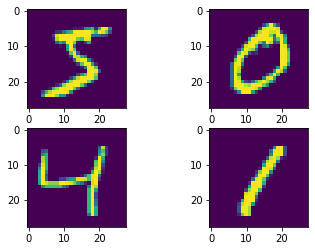

In [128]:
import matplotlib.pyplot as plt
%matplotlib inline
# the data, split between train and test sets
# load it for display
(x_train,_) , (_, _) = mnist.load_data()

plt.subplot(221)
plt.imshow(x_train[0],)
plt.subplot(222)
plt.imshow(x_train[1])
plt.subplot(223)
plt.imshow(x_train[2])
plt.subplot(224)
plt.imshow(x_train[3])
plt.show()

In the case of MNIST where the pixel values are gray scale, the pixel dimension is set to 1.

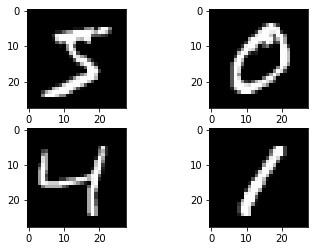

In [129]:
(x_train,_) , (_, _) = mnist.load_data()
plt.subplot(221)
plt.imshow(x_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(x_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(x_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(x_train[3], cmap=plt.get_cmap('gray'))
plt.show()

In [130]:
# reshape to be [samples][pixels][width][height]

X_train = X_train.reshape(X_train.shape[0], 28,28, 1)
X_test = X_test.reshape(X_test.shape[0], 28,28, 1)
input_shape = (28,28, 1)

In [131]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255 # Normalize pixel values to be between 0 and 1
X_test /= 255 # Normalize pixel values to be between 0 and 1
print('x_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


### Hot Encode ###
The label field is originally a number from 0 to 9, which must be converted into 10 combinations of 0 and 1, corresponding to 10 output neurons respectively.

In [132]:
# one hot encode outputs -- Do not keep running this cell!! 
num_classes=10
y_train = utils.to_categorical(y_train,num_classes)
y_test = utils.to_categorical(y_test,num_classes)

print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


### The Model ###

**Conv2D** : convolutional layer,The layer has 32 feature maps, which with the size of 5×5 and RELU activation function.  

**MaxPool2D** : pooling layer,It is configured with a pool size of 2×2.  

**Dropout** : regularization layer,It is configured to randomly exclude 20% of neurons in the layer in order to reduce overfitting.  

**Flatten** : converts the multi-dimensional(2D matrix data) input into a one-dimensional(Vector) output, which is used in the transition from the convolutional layer to the fully connected layer

**fully connected layer** :  It with 128 neurons and RELU activation function.  

**Output layer**: It has 10 neurons for the 10 classes and a **softmax** activation function to output probability-like predictions for each class

In [133]:
# create model
model = Sequential()
model.add(Conv2D(32, (5, 5), input_shape=(28, 28,1), activation='relu')) 
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1290      
Total params: 592,074
Trainable params: 592,074
Non-trainable params: 0
________________________________________________

### The Model Parameters ###

The parameters (learnable weights) in the Conv2D layer is calculated as:  

Conv2D Params = ((Conv2DSize * Conv2DSize)* PrevLayerFilter + Bias))* Conv2DFilters).  
Conv2D Params = ((5 * 5) * 1 + 1) * 32 = 832  

The 2nd learnable params is : 4608 * 128 = 589952  
THe 3rd learnable params is : 128 * 10 = 1290

### Compiling the Model ###

In [134]:
# Compile model
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

### Training the Model ###

In [135]:
history = model.fit(X_train, y_train, epochs=10,batch_size=200, verbose=1, validation_data=(X_test, y_test))

# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=1)
print(model.metrics_names[0], scores[0])
print(model.metrics_names[1], scores[1])

Epoch 1/10
300/300 [==============================] - 2s 4ms/step - loss: 0.2438 - accuracy: 0.9315 - val_loss: 0.0788 - val_accuracy: 0.9758
Epoch 2/10
300/300 [==============================] - 1s 3ms/step - loss: 0.0695 - accuracy: 0.9793 - val_loss: 0.0519 - val_accuracy: 0.9839
Epoch 3/10
300/300 [==============================] - 1s 3ms/step - loss: 0.0508 - accuracy: 0.9847 - val_loss: 0.0481 - val_accuracy: 0.9852
Epoch 4/10
300/300 [==============================] - 1s 3ms/step - loss: 0.0387 - accuracy: 0.9876 - val_loss: 0.0398 - val_accuracy: 0.9860
Epoch 5/10
300/300 [==============================] - 1s 3ms/step - loss: 0.0317 - accuracy: 0.9899 - val_loss: 0.0345 - val_accuracy: 0.9892
Epoch 6/10
300/300 [==============================] - 1s 3ms/step - loss: 0.0272 - accuracy: 0.9918 - val_loss: 0.0352 - val_accuracy: 0.9887
Epoch 7/10
300/300 [==============================] - 1s 3ms/step - loss: 0.0220 - accuracy: 0.9929 - val_loss: 0.0368 - val_accuracy: 0.9888
Epoch 

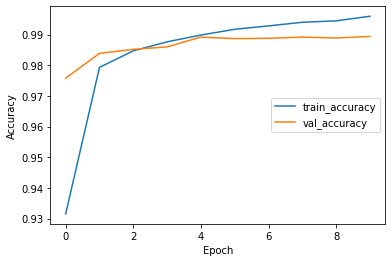

In [141]:
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='center right') #The label location

### Check in the individual predictions


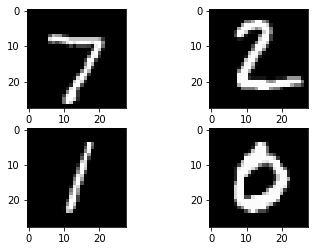

In [137]:
plt.subplot(221)
plt.imshow(X_test[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_test[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_test[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_test[3], cmap=plt.get_cmap('gray'))
plt.show()

In [138]:
#check individual prediction 
y = np.expand_dims(X_test[0], axis=0) #Expand dimention in order to input model ,from (28, 28, 1) to (1, 28, 28, 1)
result=np.argmax(model.predict(y)) # The value which has highest probility is prediction result
print(result)
y = np.expand_dims(X_test[1], axis=0)
result=np.argmax(model.predict(y))
print(result)
y = np.expand_dims(X_test[2], axis=0)
result=np.argmax(model.predict(y))
print(result)
y = np.expand_dims(X_test[3], axis=0)
result=np.argmax(model.predict(y))
print(result)

7
2
1
0
